<a href="https://colab.research.google.com/github/madhav2145/ScoreGrapher/blob/main/end_to_end_ml_placements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/placement.csv')

In [ ]:
df.head()

In [ ]:
df.shape

(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt


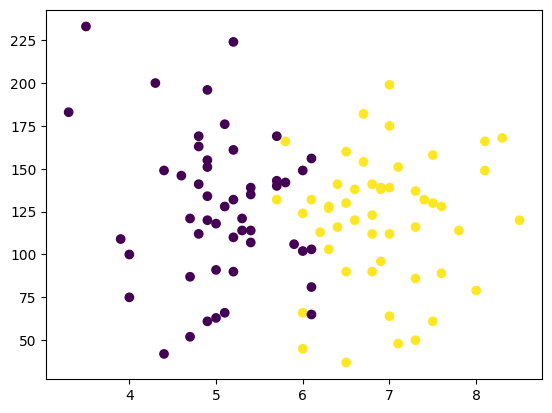

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
84,5.7,169.0
94,4.7,52.0
47,5.2,161.0
43,6.8,141.0
50,3.5,233.0
...,...,...
66,6.9,96.0
24,4.7,121.0
49,5.4,135.0
51,4.8,141.0


In [ ]:
y_train

84    0
94    0
47    0
43    1
50    0
     ..
66    1
24    0
49    0
51    0
91    1
Name: placement, Length: 90, dtype: int64

In [ ]:
x_test

,cgpa,iq
13,6.4,116.0
53,8.3,168.0
1,5.9,106.0
58,8.0,79.0
29,7.0,112.0
69,8.5,120.0
81,5.4,107.0
23,4.7,87.0
26,7.0,199.0
28,5.2,90.0


In [ ]:
y_test

13    1
53    1
1     0
58    1
29    1
69    1
81    0
23    0
26    1
28    0
Name: placement, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train

array([[-0.1993583 ,  1.11713905],
       [-1.11013227, -1.79749777],
       [-0.65474529,  0.91784765],
       [ 0.80249307,  0.41961913],
       [-2.20306104,  2.71147031],
       [ 0.16495129,  0.79329052],
       [-0.65474529, -0.35263507],
       [-0.56366789, -0.25298937],
       [ 0.34710608,  0.09577059],
       [-0.47259049, -0.25298937],
       [ 1.44003485, -1.57329494],
       [-1.01905488, -0.30281222],
       [ 0.89357046,  0.34488485],
       [-0.1993583 ,  0.46944198],
       [ 1.71326704, -0.25298937],
       [ 0.07387389, -0.55192648],
       [ 0.52926087, -0.85086359],
       [ 0.07387389, -1.44873781],
       [-0.1993583 ,  0.3947077 ],
       [ 0.62033827,  0.34488485],
       [ 0.16495129,  0.1954163 ],
       [-0.92797748, -0.10352081],
       [-0.65474529,  2.48726748],
       [-0.92797748,  0.76837909],
       [ 1.25788005,  0.31997343],
       [ 0.52926087,  0.14559344],
       [-0.92797748, -1.57329494],
       [-0.92797748,  0.66873339],
       [-1.38336447,

In [ ]:
x_test

array([[-0.18795945, -0.06752023],
       [ 1.30005284,  1.39541814],
       [-0.57954163, -0.34885454],
       [ 1.06510353, -1.10845715],
       [ 0.28193917, -0.18005395],
       [ 1.45668571,  0.04501349],
       [-0.97112381, -0.32072111],
       [-1.51933886, -0.88338971],
       [ 0.28193917,  2.26755448],
       [-1.12775668, -0.79898942]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#  y_pred = clf.predict(x_test)
clf.predict(x_test)


array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
y_test


13    1
53    1
1     0
58    1
29    1
69    1
81    0
23    0
26    1
28    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

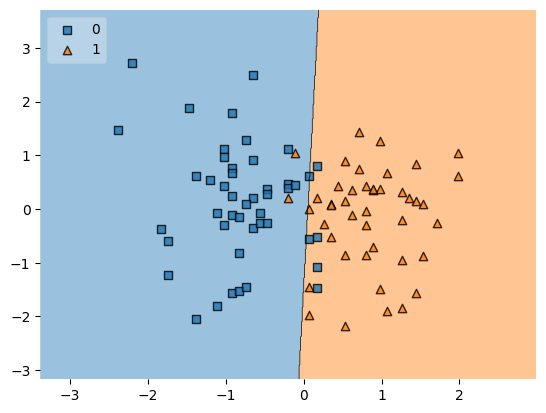

In [ ]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))